In [1]:
import torch
import torch.nn as nn
import numpy as numpy
from tqdm import trange, tqdm
import matplotlib.pyplot as plt

In [2]:
@torch.no_grad()
def get_lipz_bound(model, x_shape, eps=1e-7, norm=2, times=100, bn=None):
    """
    Compute the Lipschitz bound of a model on a batch of inputs
    """
    max_lipz = 0
    for i in trange(times):
        x1 = torch.randn(x_shape)
        x2 = x1 + eps * torch.sign(torch.randn(x_shape))
        y1 = model(x1)
        y2 = model(x2)
        if bn is not None:
            y1 = bn(y1)
            y2 = bn(y2)
        y_norm = torch.norm(y1 - y2, dim=(1,2,3), p=norm)
        x_norm = torch.norm(x1 - x2, dim=(1,2,3), p=norm)
        lipz = torch.max(y_norm / x_norm)
        if lipz > max_lipz:
            max_lipz = lipz
    return max_lipz


In [3]:
input_channels = 512
output_channels = [32, 64, 128, 256, 512, 1024, 2048, 4096]
input = torch.randn(4, input_channels, 32, 32)
x_shape = input.shape

In [4]:
# lipz with output_channels change
lipz_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_list.append(lipz)

# lipz with output_channels change with bn
lipz_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_bn_list.append(lipz)

100%|██████████| 100/100 [00:44<00:00,  2.27it/s]


In [5]:
# lipz with output_channels change and xavier_normal init
lipz_xn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.xavier_normal_(convlution.weight, gain=1.0)
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_xn_list.append(lipz)

# lipz with output_channels change and xavier_uniform init
lipz_xu_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.xavier_uniform_(convlution.weight, gain=1.0)
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_xu_list.append(lipz)

# lipz with output_channels change and xavier_normal init + bn
lipz_xn_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.xavier_normal_(convlution.weight, gain=1.0)
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_xn_bn_list.append(lipz)

# lipz with output_channels change and xavier_uniform init + bn
lipz_xu_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.xavier_uniform_(convlution.weight, gain=1.0)
    x = torch.randn(4, input_channels, 32, 32)
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_xu_bn_list.append(lipz)

100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


In [6]:
# lipz with output_channels change and kaiming_normal init
lipz_kni_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_normal_(convlution.weight, mode='fan_in', nonlinearity='relu')
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_kni_list.append(lipz)

# lipz with output_channels change and kaiming_uniform init
lipz_kui_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_uniform_(convlution.weight, mode='fan_in', nonlinearity='relu')
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_kui_list.append(lipz)

# lipz with output_channels change and kaiming_normal init
lipz_kno_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_normal_(convlution.weight, mode='fan_out', nonlinearity='relu')
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_kno_list.append(lipz)

# lipz with output_channels change and kaiming_uniform init
lipz_kuo_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_uniform_(convlution.weight, mode='fan_out', nonlinearity='relu')
    lipz = get_lipz_bound(convlution, x_shape).item()
    lipz_kuo_list.append(lipz)

# lipz with output_channels change and kaiming_normal init
lipz_kni_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_normal_(convlution.weight, mode='fan_in', nonlinearity='relu')
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_kni_bn_list.append(lipz)

# lipz with output_channels change and kaiming_uniform init
lipz_kui_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_uniform_(convlution.weight, mode='fan_in', nonlinearity='relu')
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_kui_bn_list.append(lipz)

# lipz with output_channels change and kaiming_normal init
lipz_kno_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_normal_(convlution.weight, mode='fan_out', nonlinearity='relu')
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_kno_bn_list.append(lipz)

# lipz with output_channels change and kaiming_uniform init
lipz_kuo_bn_list = []
for out_ch in output_channels:
    convlution = nn.Conv2d(input_channels, out_ch, kernel_size=3, stride=1, padding=1)
    nn.init.kaiming_uniform_(convlution.weight, mode='fan_out', nonlinearity='relu')
    bn = nn.BatchNorm2d(out_ch)
    nn.init.constant_(bn.weight, 1)
    nn.init.constant_(bn.bias, 0)
    lipz = get_lipz_bound(convlution, x_shape, bn=bn).item()
    lipz_kuo_bn_list.append(lipz)

100%|██████████| 100/100 [00:44<00:00,  2.23it/s]


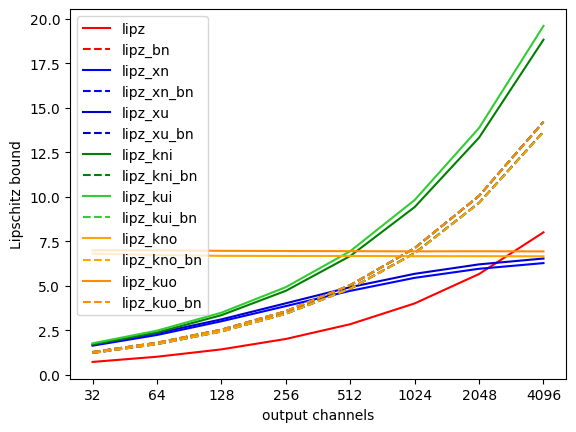

In [7]:
# plot the output channel with multiple lipz:
#   lipz: lipz_list, lipz_bn_list
#   xavier_normal: lipz_xn_list, lipz_xn_bn_list
#   xavier_uniform: lipz_xu_list, lipz_xu_bn_list
#   kaiming_normal_in: lipz_kni_list, lipz_kni_bn_list
#   kaiming_uniform_in: lipz_kui_list, lipz_kui_bn_list
#   kaiming_normal_out: lipz_kno_list, lipz_kno_bn_list
#   kaiming_uniform_out: lipz_kuo_list, lipz_kuo_bn_list
# each row use the same color, each column use the same marker
# lipz use red, xavier_normal use blue, xavier_uniform use mediumblue
# kaiming_normal_in use green, kaiming_uniform_in use limegreen
# kaiming_normal_out use darkgreen, kaiming_uniform_out use forestgreen
import matplotlib.pyplot as plt
output_channels_label = [str(i) for i in output_channels]
plt.plot(output_channels_label, lipz_list, 'r-', label='lipz')
plt.plot(output_channels_label, lipz_bn_list, 'r--', label='lipz_bn')
plt.plot(output_channels_label, lipz_xn_list, 'b-', label='lipz_xn')
plt.plot(output_channels_label, lipz_xn_bn_list, 'b--', label='lipz_xn_bn')
plt.plot(output_channels_label, lipz_xu_list, 'mediumblue', label='lipz_xu')
plt.plot(output_channels_label, lipz_xu_bn_list, 'mediumblue', label='lipz_xu_bn', linestyle='--')
plt.plot(output_channels_label, lipz_kni_list, 'g-', label='lipz_kni')
plt.plot(output_channels_label, lipz_kni_bn_list, 'g--', label='lipz_kni_bn')
plt.plot(output_channels_label, lipz_kui_list, 'limegreen', label='lipz_kui')
plt.plot(output_channels_label, lipz_kui_bn_list, 'limegreen', label='lipz_kui_bn', linestyle='--')
plt.plot(output_channels_label, lipz_kno_list, 'orange', label='lipz_kno')
plt.plot(output_channels_label, lipz_kno_bn_list, 'orange', label='lipz_kno_bn', linestyle='--')
plt.plot(output_channels_label, lipz_kuo_list, 'darkorange', label='lipz_kuo')
plt.plot(output_channels_label, lipz_kuo_bn_list, 'darkorange', label='lipz_kuo_bn', linestyle='--')

plt.xlabel("output channels")
plt.ylabel("Lipschitz bound")
plt.legend()
plt.show()

# plot the output channel with lipz
# import matplotlib.pyplot as plt
# output_channels_label = [str(i) for i in output_channels]
# plt.plot(output_channels_label, lipz_list)
# plt.xlabel("output channels")
# plt.ylabel("Lipschitz bound")

# save all the lipz into csv file
import numpy as np
import pandas as pd
data = np.array([output_channels, lipz_list, lipz_bn_list, lipz_xn_list, lipz_xn_bn_list, lipz_xu_list, lipz_xu_bn_list, lipz_kni_list, lipz_kni_bn_list, lipz_kui_list, lipz_kui_bn_list, lipz_kno_list, lipz_kno_bn_list, lipz_kuo_list, lipz_kuo_bn_list])
data = data.transpose()
df = pd.DataFrame(data, columns=['output_channels', 'lipz', 'lipz_bn', 'lipz_xn', 'lipz_xn_bn', 'lipz_xu', 'lipz_xu_bn', 'lipz_kni', 'lipz_kni_bn', 'lipz_kui', 'lipz_kui_bn', 'lipz_kno', 'lipz_kno_bn', 'lipz_kuo', 'lipz_kuo_bn'])
df.to_csv('initialization_conv.csv', index=False)


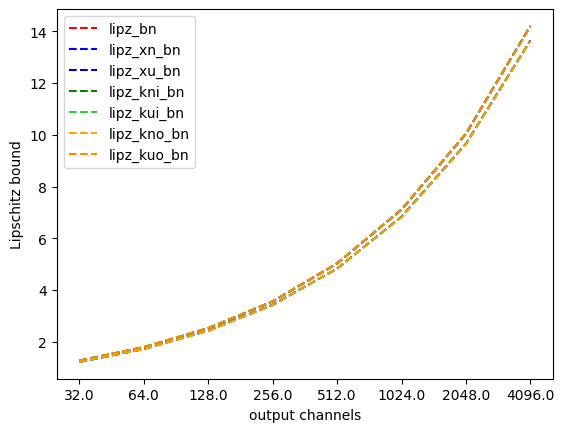

In [8]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('initialization_conv.csv')
output_channels = [str(i) for i in df['output_channels'].values]
# plot 
# plt.plot(output_channels, df['lipz'].values, 'r-', label='lipz')
plt.plot(output_channels, df['lipz_bn'].values, 'r--', label='lipz_bn')
# plt.plot(output_channels, df['lipz_xn'].values, 'b-', label='lipz_xn')
plt.plot(output_channels, df['lipz_xn_bn'].values, 'b--', label='lipz_xn_bn')
# plt.plot(output_channels, df['lipz_xu'].values, 'mediumblue', label='lipz_xu')
plt.plot(output_channels, df['lipz_xu_bn'].values, 'mediumblue', label='lipz_xu_bn', linestyle='--')
# plt.plot(output_channels, df['lipz_kni'].values, 'g-', label='lipz_kni')
plt.plot(output_channels, df['lipz_kni_bn'].values, 'g--', label='lipz_kni_bn')
# plt.plot(output_channels, df['lipz_kui'].values, 'limegreen', label='lipz_kui')
plt.plot(output_channels, df['lipz_kui_bn'].values, 'limegreen', label='lipz_kui_bn', linestyle='--')
# plt.plot(output_channels, df['lipz_kno'].values, 'orange', label='lipz_kno')
plt.plot(output_channels, df['lipz_kno_bn'].values, 'orange', label='lipz_kno_bn', linestyle='--')
# plt.plot(output_channels, df['lipz_kuo'].values, 'darkorange', label='lipz_kuo')
plt.plot(output_channels, df['lipz_kuo_bn'].values, 'darkorange', label='lipz_kuo_bn', linestyle='--')

plt.xlabel("output channels")
plt.ylabel("Lipschitz bound")
plt.legend()
plt.show()